2.1 Implementacion y visualizacion de k-means en 2D:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Cargar los datos no escalados
x=pd.read_table("kmeans1.csv", delimiter=",")
print(x)

             A          B
0    -3.032505  -3.367918
1    -2.603797  -1.616394
2    -1.357223  -0.199628
3    -2.992206  -3.523316
4    -1.708192  -1.007209
..         ...        ...
395  11.387093  11.833448
396  10.228298  11.730811
397  11.256921  12.703525
398  11.142780  11.767086
399  12.862287  12.428069

[400 rows x 2 columns]


In [24]:
# Cargar los datos escalados
data1=pd.read_table("kmeans1.csv", delimiter=",")
data1=((data1-data1.min())/(data1.max()-data1.min()))
data1.head()
print(data1.head())

          A         B
0  0.067984  0.047531
1  0.089996  0.141370
2  0.154003  0.217274
3  0.070053  0.039205
4  0.135982  0.174007


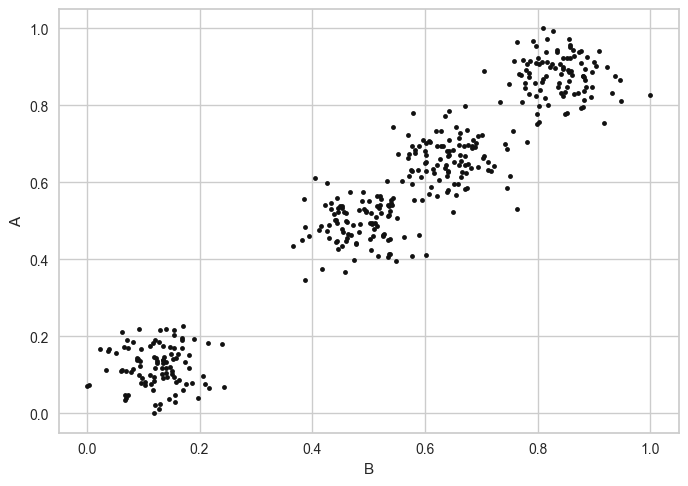

In [25]:
#Generación de gráfico de dispersión (scatter plot) de las variables A y B: En este gráfico se pueden observar 4 cluster. 

plt.plot(data1["A"], data1["B"], "k.")
plt.ylabel("A")
plt.xlabel("B")
plt.show()

In [26]:
#Aplicación del algoritmo k-means (from sklearn.cluster import KMeans:

from sklearn.cluster import KMeans
k_means_2=KMeans(n_clusters=4)
k_means_2.fit(data1)


KMeans(n_clusters=4)

In [27]:
#analisis de outputs disponibles: arroja centroides de 4 cluster.  
k_means_2.cluster_centers_

array([[0.64504777, 0.66137917],
       [0.12488096, 0.1225848 ],
       [0.83902637, 0.87789952],
       [0.48395258, 0.49330798]])

In [28]:
#Analisis de outputs disponibles: Inertia Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

k_means_2.inertia_

2.176114977897748

In [29]:
#Analisis de outputs disponibles: label de cada dato luego de k_means:

k_means_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2,

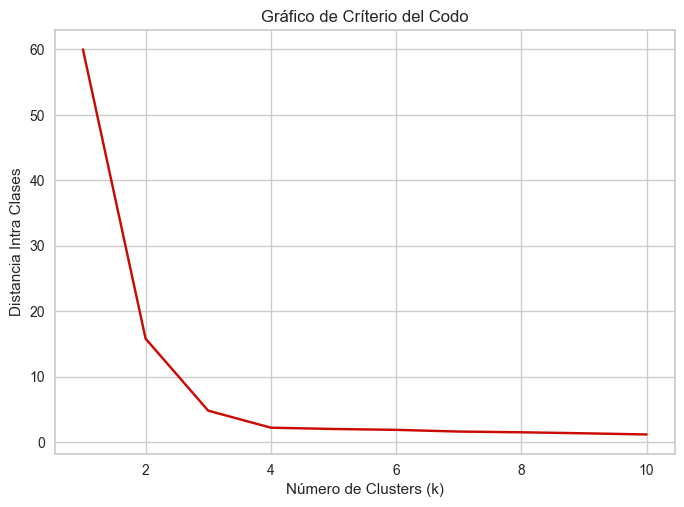

In [ ]:
#Ajuste k-means. Distancia intra clase guardada en un diccionario.

distanciaintraclase = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data1) 
    distanciaintraclase[k]=kmeans.inertia_

# Gráfico de criterio del codo: A traves de este criterio, se puede definir el número de cluster óptimo, en este caso se indica que los cluster serian 3, ya que a partir de ahí la distancia intracluster se reduce significativamente.

plt.figure()
plt.plot(list(distanciaintraclase.keys()), list(distanciaintraclase.values()), color="r")
plt.title("Gráfico de Críterio del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Distancia Intra Clases")
plt.show()

2.2 Analisis de clusters:

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Cargar los datos no escalados
data2=pd.read_table("kmeans2.csv", delimiter=",")
print(data2)

        PAC_EDAD  SATO2  TEMPERATURA  GLASGOW  EVA    HGT    FR  DIAS_HOSP
0             79   89.0         35.8     15.0  3.0  121.0  14.0       21.0
1             35   96.0         36.4     15.0  2.0  121.0  16.0       33.0
2             25   98.0         35.5     15.0  2.0  121.0  18.0       17.0
3             34   98.0         37.0     15.0  2.0  121.0  18.0        1.0
4             45   98.0         36.8     15.0  2.0  121.0  18.0       11.0
...          ...    ...          ...      ...  ...    ...   ...        ...
129984         8   99.0         36.1     15.0  1.0   75.0  14.0        1.0
129985        24   99.0         36.1     15.0  1.0   75.0  14.0        1.0
129986        52   97.0         36.5     15.0  1.0   75.0  18.0        1.0
129987        56   97.0         36.1     15.0  1.0   75.0  20.0        1.0
129988        42   96.0         36.1     15.0  1.0   75.0  16.0        1.0

[129989 rows x 8 columns]


In [ ]:
# Aplicación del algoritmo k-means. Cargar los datos escalados
data2=pd.read_table("kmeans2.csv", delimiter=",")
data2_scaler=MinMaxScaler().fit_transform(data2)

resultado ={}
for k in range (1,11):
    kmeans=KMeans(n_clusters=k, random_state=42, max_iter=1000, init="k-means++", n_init=10)
    kmeans.fit(data2_scaler)
    resultado[k]=kmeans.inertia_
print(resultado)

{1: 14469.699238126115, 2: 10314.771740203632, 3: 7754.558201854726, 4: 6625.930786573426, 5: 5589.337995471538, 6: 5085.493530909846, 7: 4732.791961993324, 8: 4442.947629486117, 9: 4198.074995384293, 10: 4023.1905342854025}


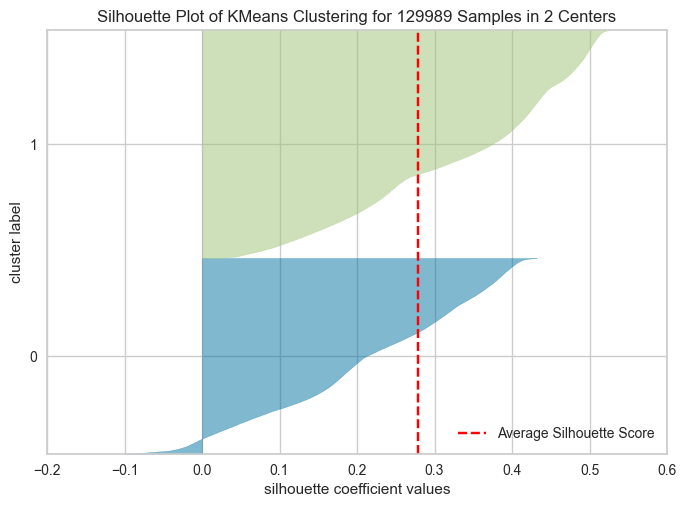

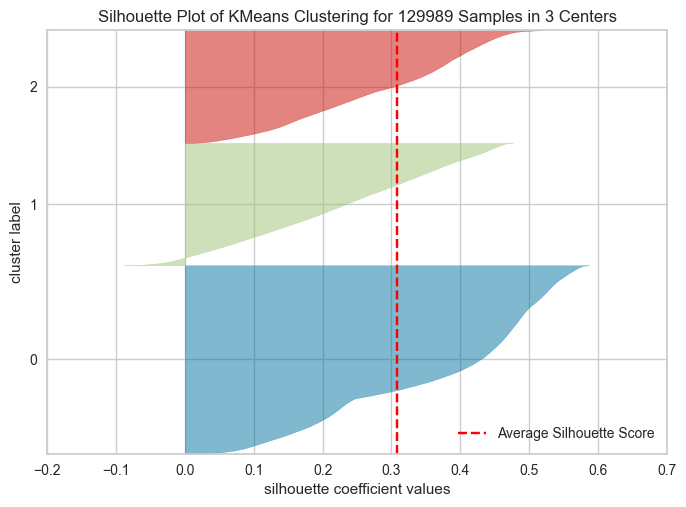

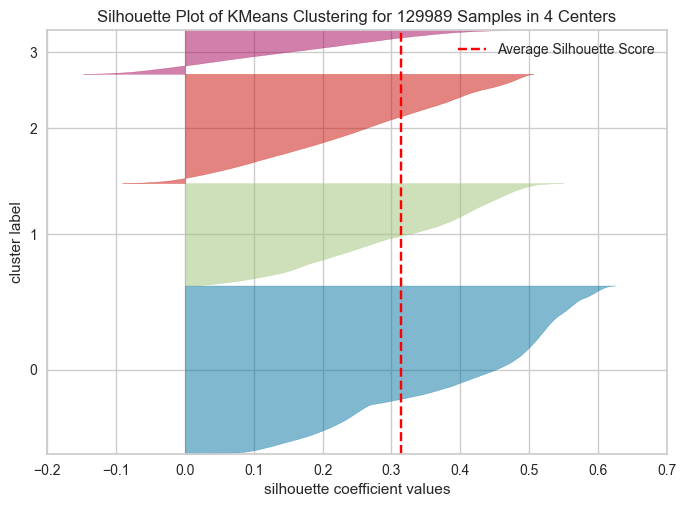

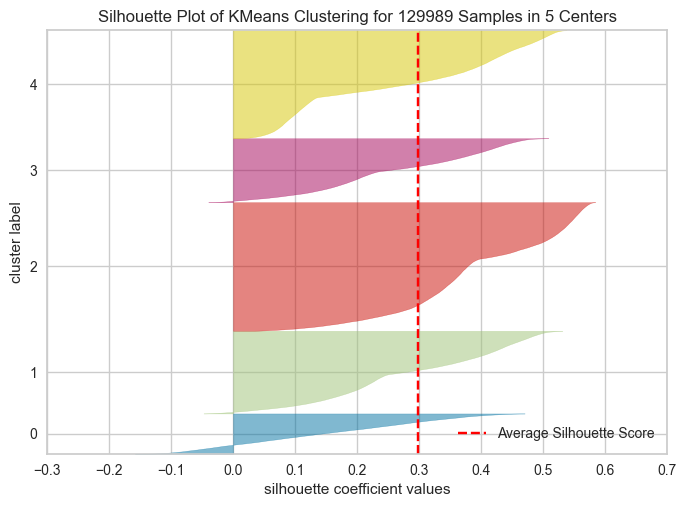

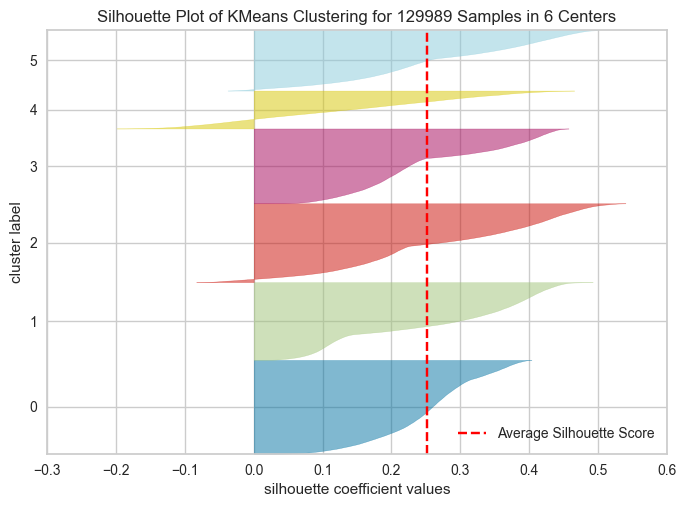

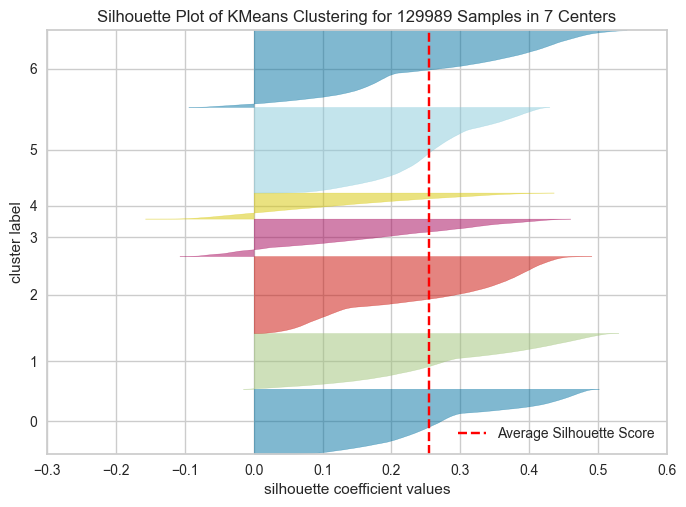

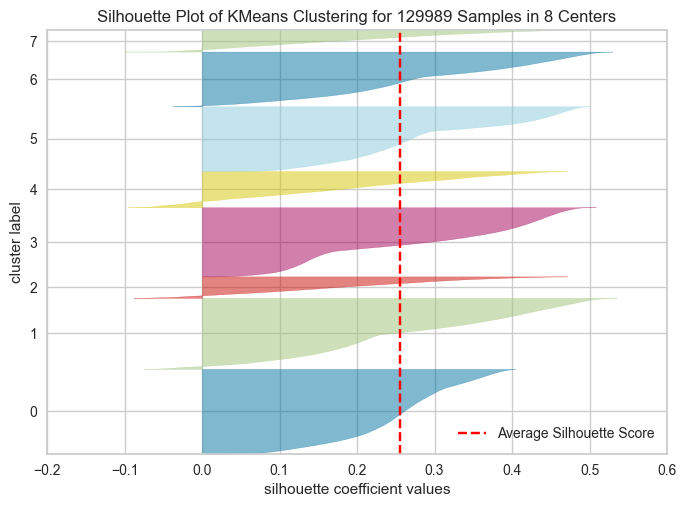

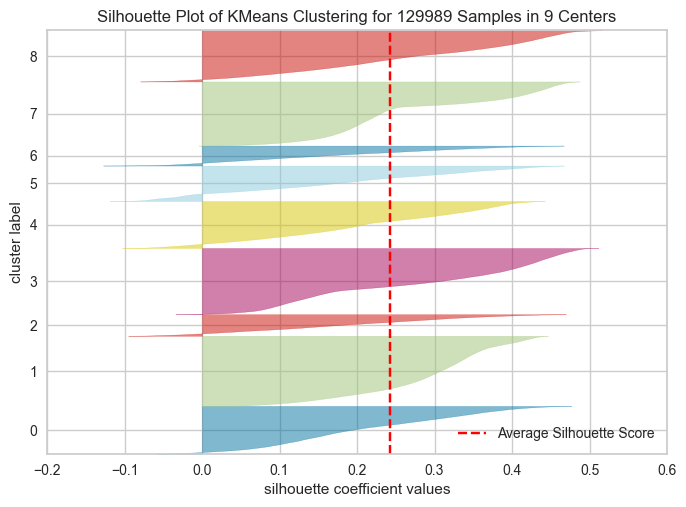

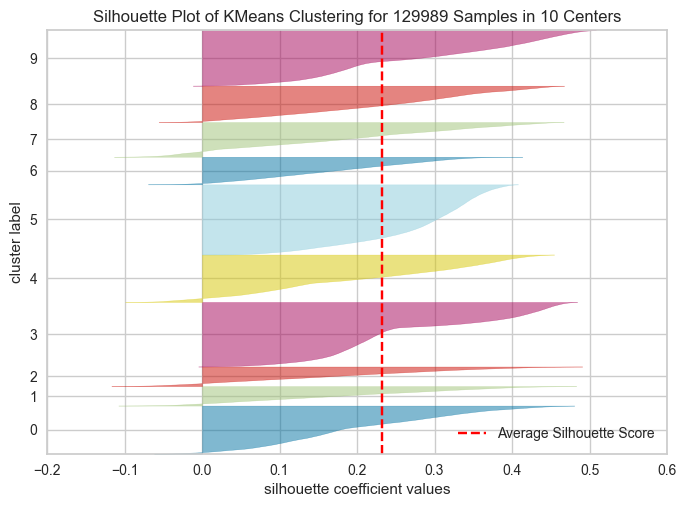

In [ ]:
#Determinación de cluster necesarios: Método Silhouette plot.
# En el primer grafico, se obseran 2 cluster: el verde los puntos están mejor agrupados, en el cluster azul, no están bien separados los cluster.
# En el segundo grafico, se observan 3 cluster,SIENDO ESTE EL NUMRO DE CLUSTER ADECUADO: Tiene una mejor agrupación de datos, con promedio sobre 0.3
# En el tercer grafico, se observan 4 cluster, no tan recomdable, debido a la poca diferencia con análisis de cluster 3 (igual tiene promedio sobre 0.3) En los tres se debe revisar valores cercanos a cero o negativos para evaluar calidad de clasificación.
# En el cuarto grafico, se observan 5 cluster, no tan recomendable, 2 cluster muy pequeños, se sigue recomendando de 3 cluster.
# En los graficos quinto al decimo, , se observa 6 a 10  cluster, no es recomendable, promedio bajo 0.3, no es óptimo debido a que hay puntos no estan claramente asignados. 


for k in range (2,11):
    kmeans=KMeans(n_clusters=k, random_state=42, max_iter=1000, init="k-means++", n_init=10)
    visualizer=SilhouetteVisualizer(kmeans, colors="yellowbrick")
    visualizer.fit(data2_scaler)
    visualizer.show()
    

        PAC_EDAD  SATO2  TEMPERATURA  GLASGOW  EVA    HGT    FR  DIAS_HOSP
0             79   89.0         35.8     15.0  3.0  121.0  14.0       21.0
1             35   96.0         36.4     15.0  2.0  121.0  16.0       33.0
2             25   98.0         35.5     15.0  2.0  121.0  18.0       17.0
3             34   98.0         37.0     15.0  2.0  121.0  18.0        1.0
4             45   98.0         36.8     15.0  2.0  121.0  18.0       11.0
...          ...    ...          ...      ...  ...    ...   ...        ...
129984         8   99.0         36.1     15.0  1.0   75.0  14.0        1.0
129985        24   99.0         36.1     15.0  1.0   75.0  14.0        1.0
129986        52   97.0         36.5     15.0  1.0   75.0  18.0        1.0
129987        56   97.0         36.1     15.0  1.0   75.0  20.0        1.0
129988        42   96.0         36.1     15.0  1.0   75.0  16.0        1.0

[129989 rows x 8 columns]


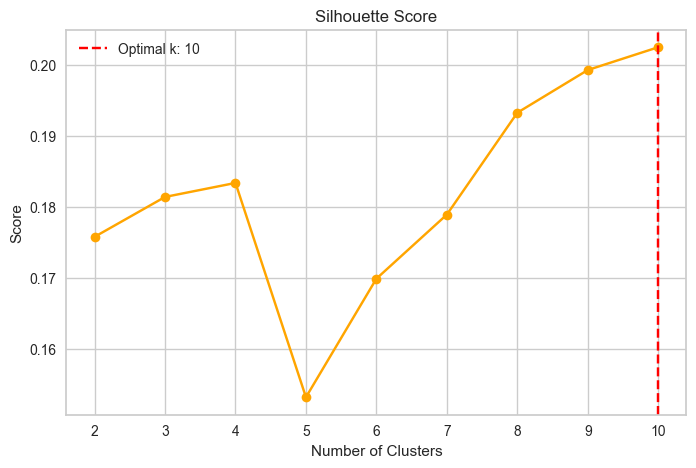

{'Optimal Clusters (Silhouette Score)': 10}

In [ ]:
#funcion para reporte de las metricas y visualizaciones: cluster evaluados 10. En eje Y valor alto indica mejor agrupación para cluster 10, pero al tener poca diferencia entre las demas, pierde relevancia, recomendando utilizar menor cluster.La caida 
#en 5 cluster, significa que es el peor en calidad de clasificación respecto a otros cluster.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos no escalados
info=pd.read_table("kmeans2.csv", delimiter=",")
print(info)

#Definicion de funcion con silhouette Score
def silhouette_optimized_clustering(info, k_range=range(2, 11)):
 
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt
    
    scaler = StandardScaler()
    info_scaled = scaler.fit_transform(info)
    
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(info_scaled)
        silhouette_scores.append(silhouette_score(info_scaled, labels))
    
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_scores, marker='o', color='orange')
    plt.title("Silhouette Score")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")
    plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k: {optimal_k}')
    plt.legend()
    plt.show()

    return {"Optimal Clusters (Silhouette Score)": optimal_k}

silhouette_report = silhouette_optimized_clustering(info, k_range=range(2, 11))
silhouette_report


In [47]:
#Intepretacion de de centroides: 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos no escalados
info=pd.read_table("kmeans2.csv", delimiter=",")

def analyze_cluster_centroids(info, n_clusters, scaler):
   
    from sklearn.cluster import KMeans
    import pandas as pd

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaler.transform(info))  # Use scaled data for clustering

    # Get cluster centroids
    centroids_scaled = kmeans.cluster_centers_

    # Perform inverse transformation to get original scale values
    centroids_original = scaler.inverse_transform(centroids_scaled)

    # Create a DataFrame for better readability
    centroids_df = pd.DataFrame(
        centroids_original,
        columns=info.columns,
        index=[f"Cluster {i+1}" for i in range(n_clusters)]
    )

    return centroids_df

# Perform clustering and analyze centroids based on the determined optimal clusters (3 clusters)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(info)
centroids_report = analyze_cluster_centroids(info, n_clusters=3, scaler=scaler)

print(centroids_report)


            PAC_EDAD      SATO2  TEMPERATURA    GLASGOW       EVA         HGT  \
Cluster 1  11.149005  97.479467    36.909881  14.992151  3.400578  163.039471   
Cluster 2  55.920450  96.627253    36.524667  14.916991  4.421610  181.805445   
Cluster 3  24.500000  97.623944    36.586197  14.984507  4.361972  164.807042   

                  FR  DIAS_HOSP  
Cluster 1  19.199451   1.209596  
Cluster 2  17.474998   1.174415  
Cluster 3  17.430986  58.564789  
